In [5]:

import gymnasium as gym
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots

from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd

runtime = 0.06 seconds


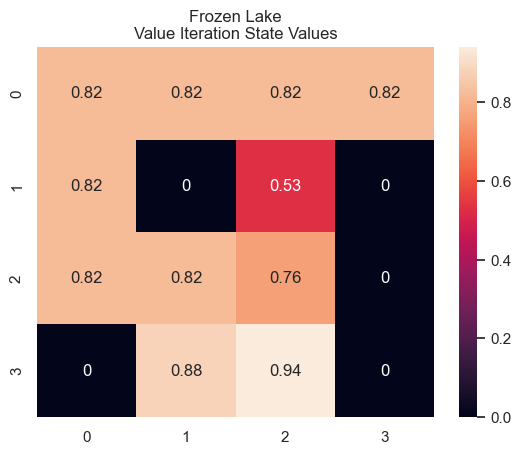

In [15]:
frozen_lake = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=5000)
size=(4,4)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

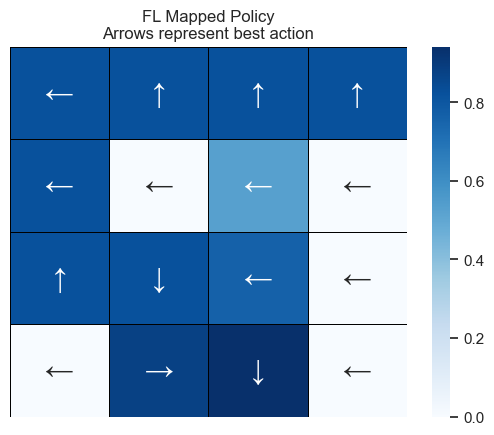

In [16]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(4,4)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

runtime = 0.06 seconds


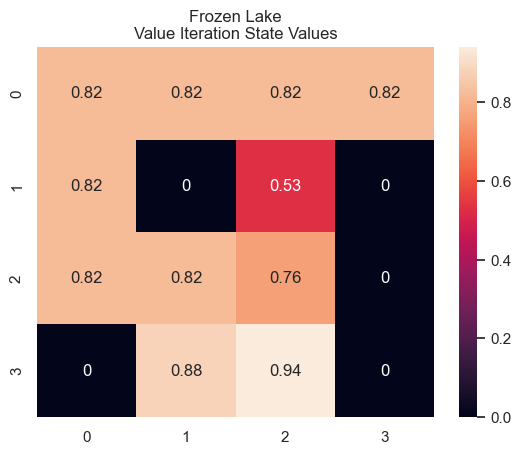

In [170]:
# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
frozen_lake = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=5000)
size=(4,4)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

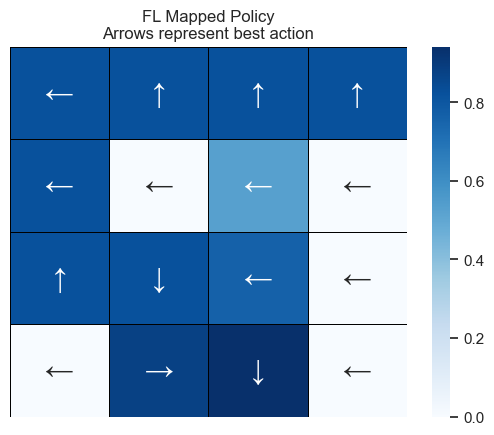

In [171]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(4,4)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds


/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


runtime = 0.03 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds


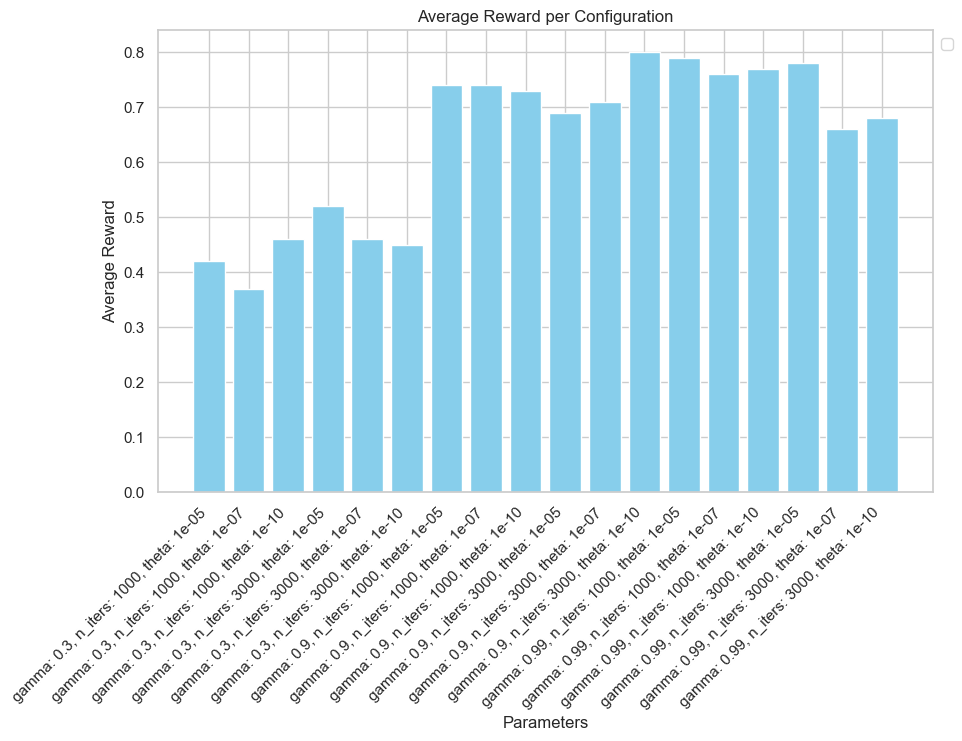

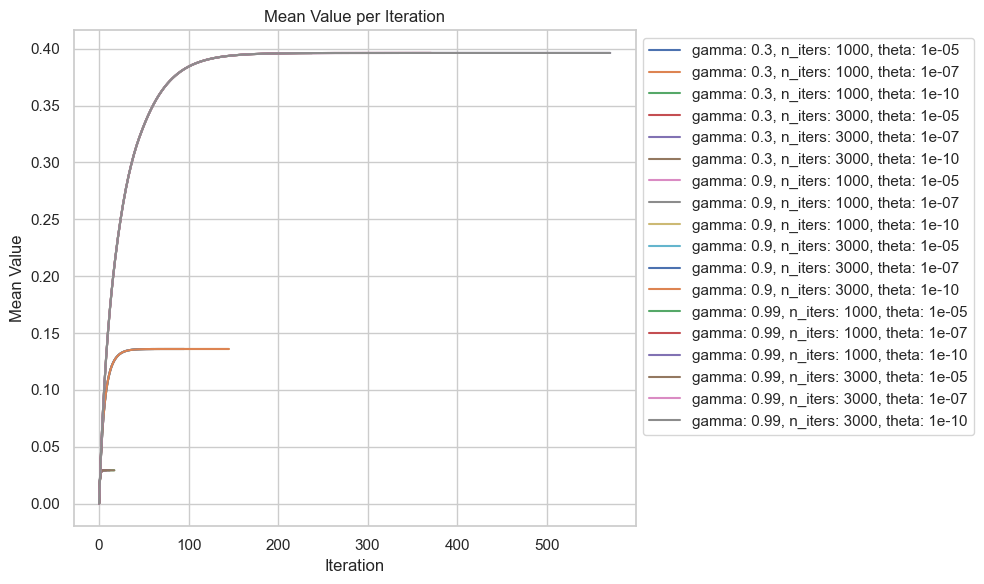

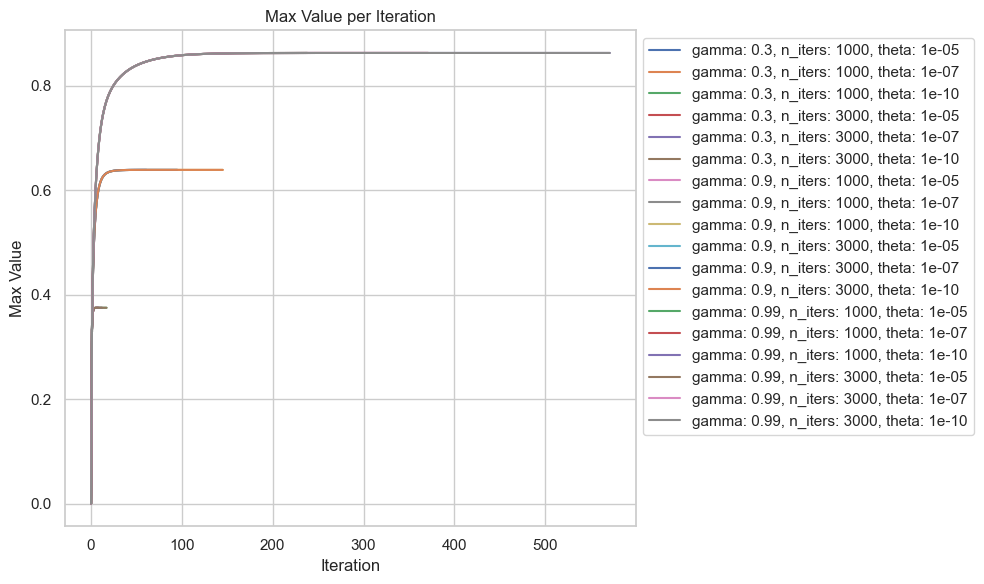

In [172]:
gamma=[.3, .9, .99]

iters = [1000, 3000]
theta=[ .00001, .0000001, .0000000001]
reward = {}
mean_vi = {}
max_vi = {}
for i in itertools.product(gamma, iters, theta):
    
    parameters = f"gamma: {i[0]}, n_iters: {i[1]}, theta: {i[2]}"
    V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=i[0], n_iters=i[1], theta=i[2])
    episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward
    mean_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
    max_value_per_iter = np.trim_zeros(np.max(V_track, axis=1), 'b')
    mean_vi[parameters] = [np.arange(len(mean_value_per_iter)).tolist(), mean_value_per_iter.tolist()]
    max_vi[parameters] = [np.arange(len(max_value_per_iter)).tolist(), max_value_per_iter.tolist()]

# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in mean_vi.items():
    plt.plot(x, y, label=parameters)
plt.title("Mean Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plot for max_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in max_vi.items():
    plt.plot(x, y, label=parameters)
plt.title("Max Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Max Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
    

runtime = 0.01 seconds


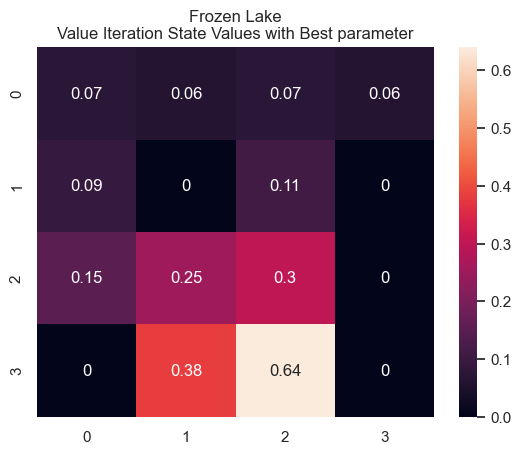

In [173]:
# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
# 0.9, 1000, 0.00001
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.9, n_iters=3000, theta=0.0000000001)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values with Best parameter", size)

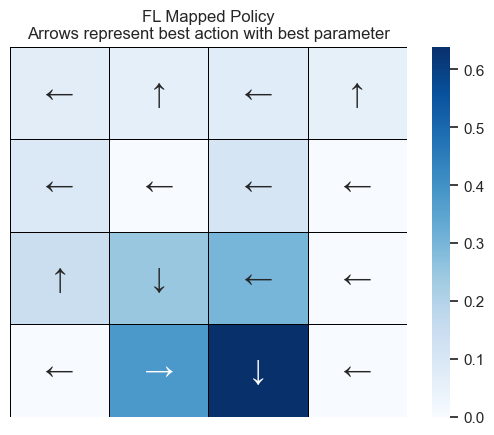

In [174]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(4,4)
title="FL Mapped Policy\nArrows represent best action with best parameter"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

## 4x4 PI

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.03 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds


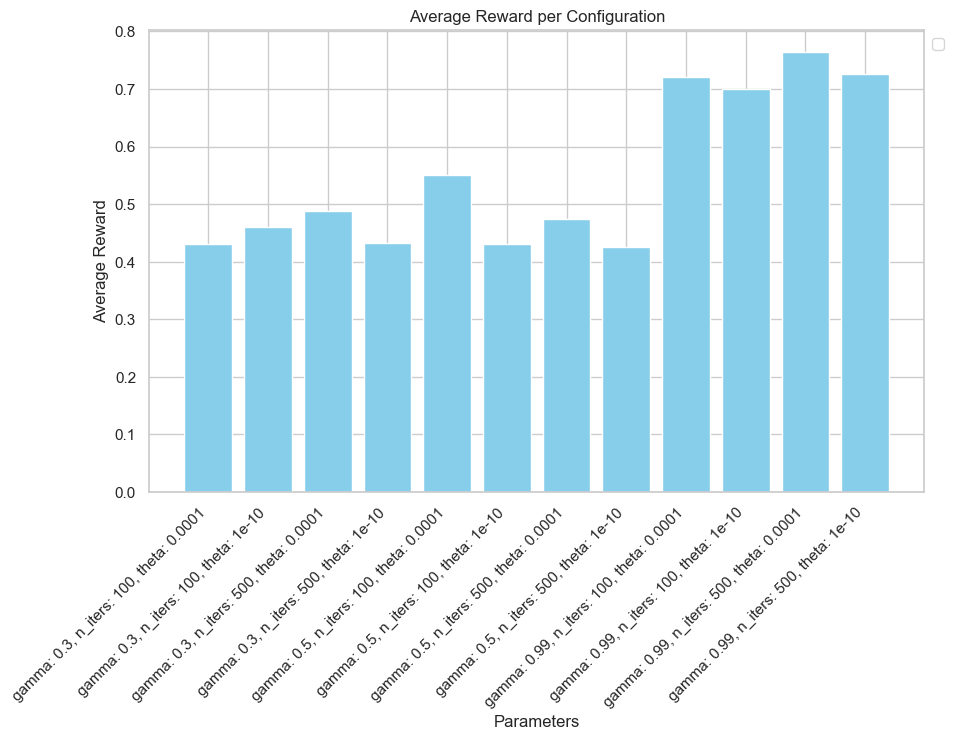

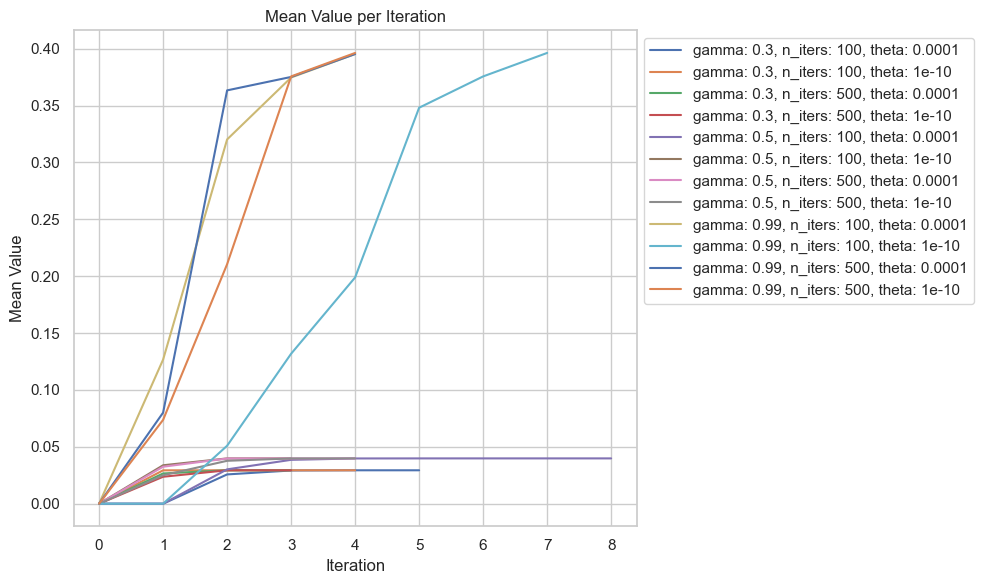

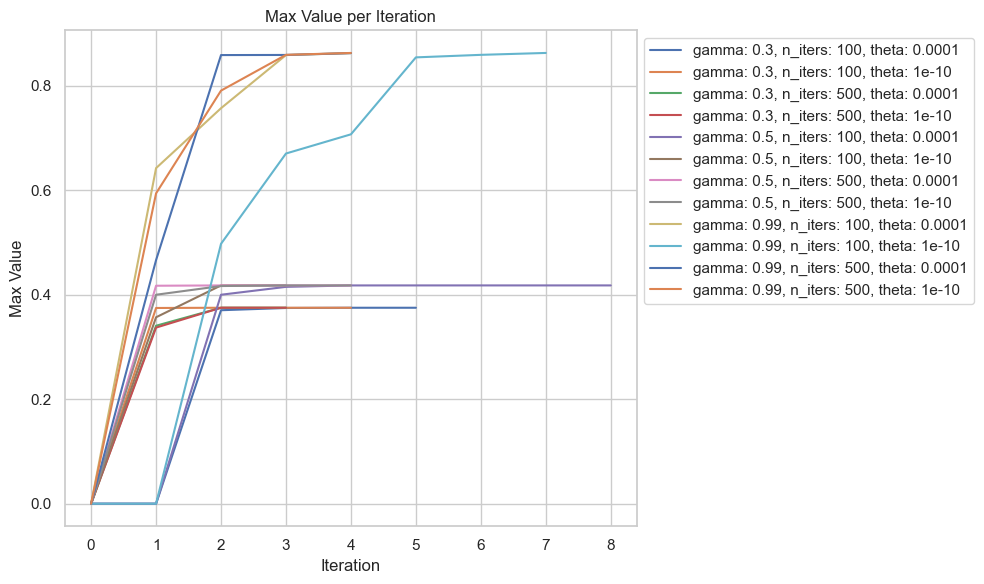

In [175]:
gamma=[.3,.5, .99]

iters = [100,500]
theta=[ .0001, .0000000001]
reward = {}
mean_pi = {}
max_pi = {}
for i in itertools.product(gamma, iters, theta):
    
    parameters = f"gamma: {i[0]}, n_iters: {i[1]}, theta: {i[2]}"
    V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=i[0], n_iters=i[1], theta=i[2])
    episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=i[1], pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward
    mean_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
    max_value_per_iter = np.trim_zeros(np.max(V_track, axis=1), 'b')
    mean_pi[parameters] = [np.arange(len(mean_value_per_iter)).tolist(), mean_value_per_iter.tolist()]
    max_pi[parameters] = [np.arange(len(max_value_per_iter)).tolist(), max_value_per_iter.tolist()]

# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in mean_pi.items():
    plt.plot(x, y, label=parameters)
plt.title("Mean Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plot for max_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in max_pi.items():
    plt.plot(x, y, label=parameters)
plt.title("Max Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Max Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
    

runtime = 0.02 seconds


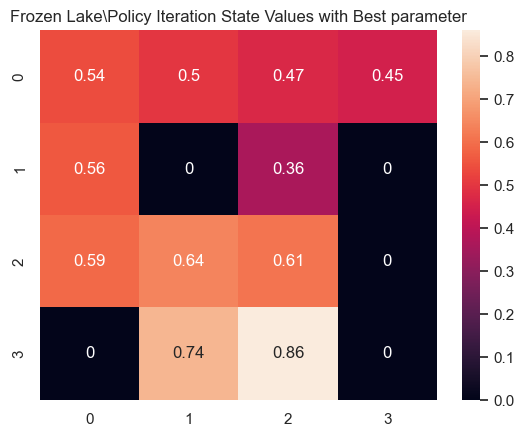

In [179]:
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.99, n_iters=500, theta=0.0001)
Plots.values_heat_map(V, "Frozen Lake\Policy Iteration State Values with Best parameter", size)

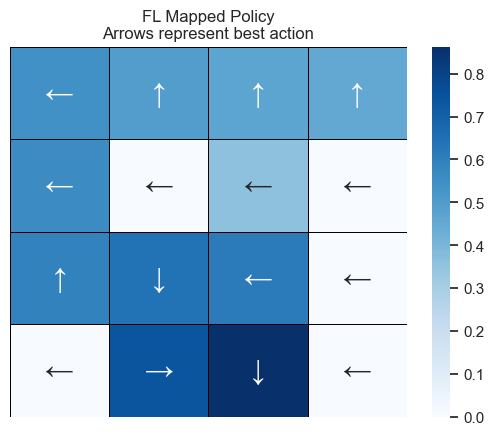

In [177]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(4,4)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

## 4x4 QLearning

runtime = 0.07 seconds


runtime = 0.06 seconds


runtime = 0.15 seconds


runtime = 0.06 seconds


runtime = 0.12 seconds


runtime = 0.12 seconds


runtime = 0.03 seconds


runtime = 0.08 seconds


runtime = 0.11 seconds


runtime = 0.05 seconds


runtime = 0.07 seconds


runtime = 0.12 seconds


runtime = 0.06 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 0.11 seconds


runtime = 0.35 seconds


runtime = 0.03 seconds


runtime = 0.15 seconds


runtime = 0.30 seconds


runtime = 0.06 seconds


runtime = 0.06 seconds


runtime = 0.28 seconds


runtime = 0.05 seconds


runtime = 0.08 seconds


runtime = 0.29 seconds


runtime = 0.05 seconds


runtime = 0.11 seconds


runtime = 0.32 seconds


runtime = 0.04 seconds


runtime = 0.10 seconds


runtime = 0.33 seconds


runtime = 0.07 seconds


runtime = 0.10 seconds


runtime = 0.25 seconds


runtime = 0.05 seconds


runtime = 0.14 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


runtime = 0.28 seconds


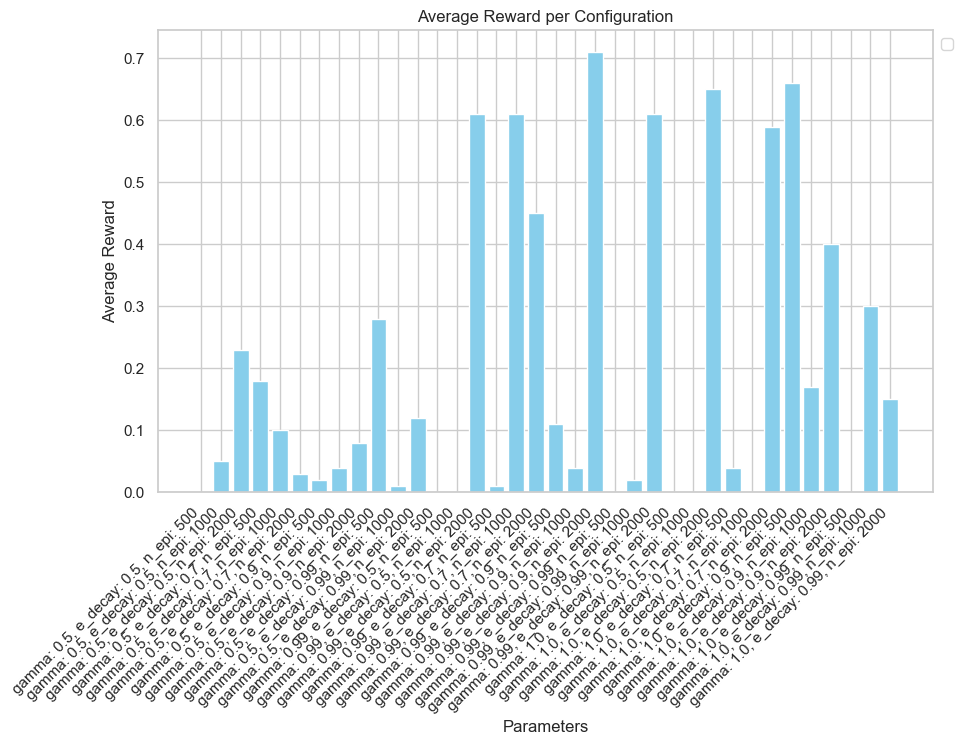

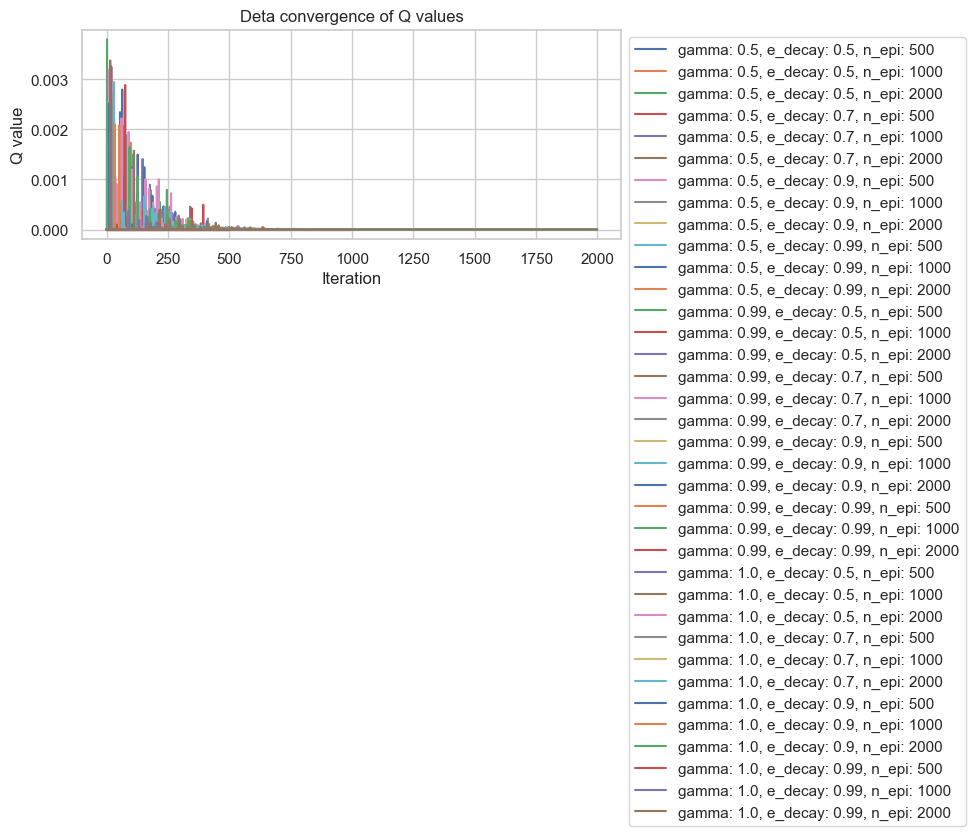

In [178]:

epsilons=[0.5, 0.7, 0.9, 0.99]
gamma=[.5, .99, 1.0]

iters = [500,1000 ,2000]
theta=[ .0001, .0000000001]
reward = {}
q_val = {}
for i in itertools.product(gamma, epsilons, iters):
    
    parameters = f"gamma: {i[0]}, e_decay: {i[1]}, n_epi: {i[2]}"
    Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=i[0], epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward

    q_value_changes = np.zeros(Q_track.shape[0]-1)
    for i in range(1, Q_track.shape[0]):
        q_value_changes[i - 1] = np.mean((Q_track[i] - Q_track[i - 1]) ** 2)

        # Plot the MSE values
    # plt.plot(q_value_changes, label=cur_title)
    q_val[parameters] = q_value_changes
# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, values in q_val.items():
    plt.plot(values, label=parameters)
plt.title("Deta convergence of Q values")
plt.xlabel("Iteration")
plt.ylabel("Q value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


## Result of 20 X 20

/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 2.95 seconds


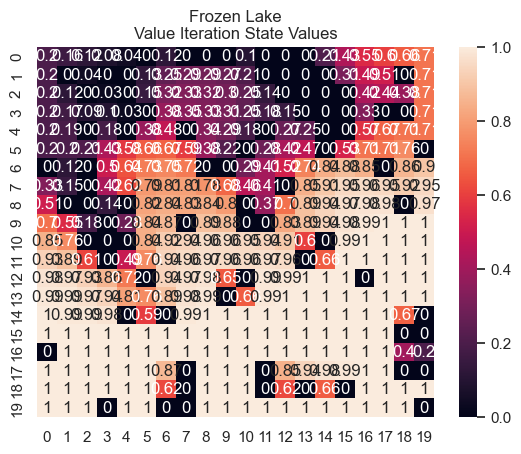

In [146]:
from gym.envs.toy_text.frozen_lake import generate_random_map

# Generate a random map for the 16x16 environment
size = 20
random_map = generate_random_map(size=size, p=0.84)  # p is the probability of frozen tiles (adjust as needed)

# Create the FrozenLake environment with the custom map
# Note: As of the last update in my knowledge, Gym might not directly support 16x16 through the make function
# This code assumes the gym library allows creating an environment with a custom map which might need actual implementation
frozen_lake = gym.make('FrozenLake-v1', desc=random_map, map_name=None, is_slippery=True)

V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=2000)
size=(20,20)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

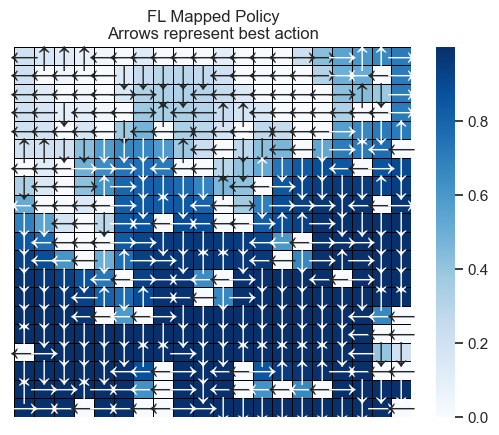

In [147]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(20,20)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

## Value Iteration

In [99]:
# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
V, V_track, pi = Planner(frozen_lake.P).value_iteration(n_iters=5000)

runtime = 2.51 seconds


runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.41 seconds


/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.76 seconds
runtime = 0.40 seconds
runtime = 1.20 seconds
runtime = 0.39 seconds
runtime = 1.19 seconds
runtime = 0.73 seconds
runtime = 0.73 seconds
runtime = 0.75 seconds
runtime = 1.44 seconds
runtime = 0.75 seconds
runtime = 2.88 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


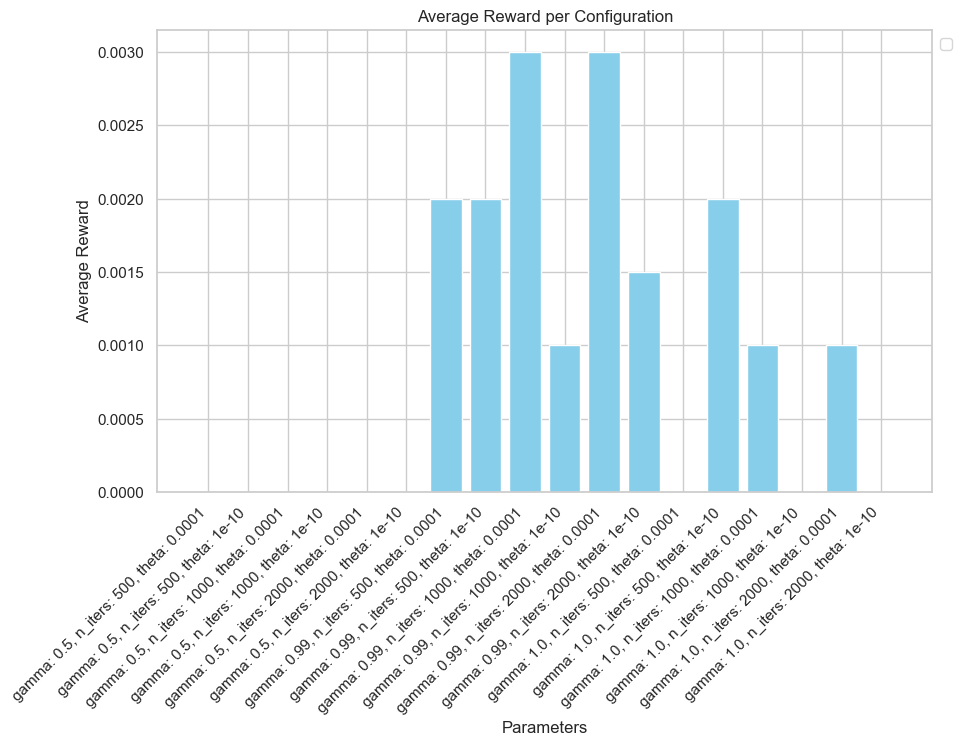

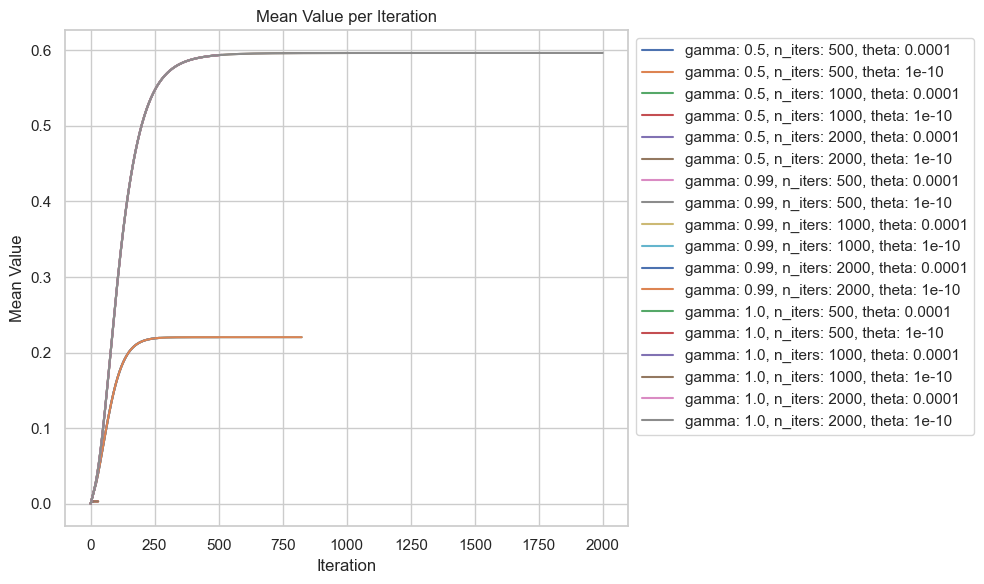

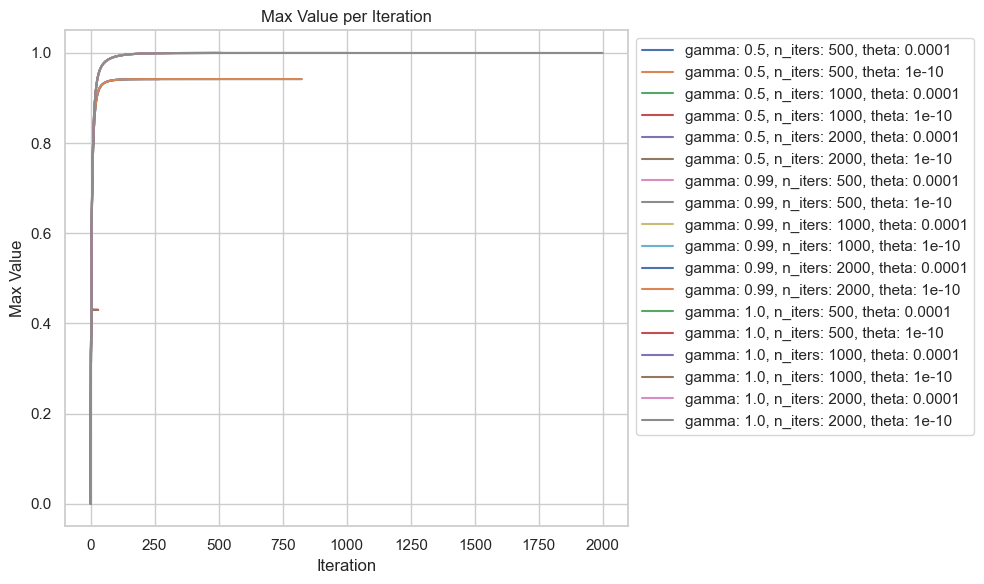

In [155]:
gamma=[.5, .99, 1.0]

iters = [500,1000 ,2000]
theta=[ .0001, .0000000001]
reward = {}
mean_vi = {}
max_vi = {}
for i in itertools.product(gamma, iters, theta):
    
    parameters = f"gamma: {i[0]}, n_iters: {i[1]}, theta: {i[2]}"
    V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=i[0], n_iters=i[1], theta=i[2])
    episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=i[1], pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward
    mean_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
    max_value_per_iter = np.trim_zeros(np.max(V_track, axis=1), 'b')
    mean_vi[parameters] = [np.arange(len(mean_value_per_iter)).tolist(), mean_value_per_iter.tolist()]
    max_vi[parameters] = [np.arange(len(max_value_per_iter)).tolist(), max_value_per_iter.tolist()]

# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in mean_vi.items():
    plt.plot(x, y, label=parameters)
plt.title("Mean Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plot for max_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in max_vi.items():
    plt.plot(x, y, label=parameters)
plt.title("Max Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Max Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
    

/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.77 seconds


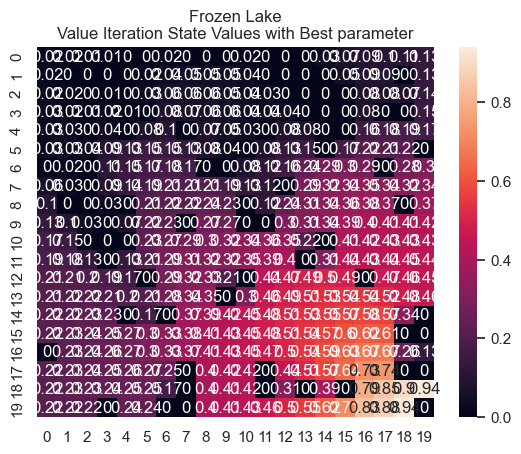

In [158]:
# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
# 0.9, 1000, 0.00001
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.99, n_iters=500, theta=0.0000000001)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values with Best parameter", size)

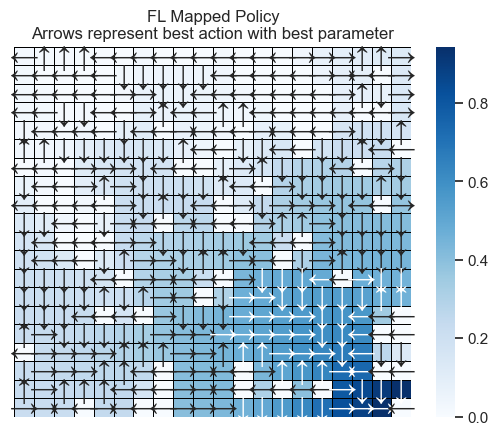

In [160]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(20,20)
title="FL Mapped Policy\nArrows represent best action with best parameter"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

### Policy Iteration

In [58]:
# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(n_iters=5000)

runtime = 5.60 seconds


runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.06 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.23 seconds
runtime = 1.08 seconds
runtime = 0.22 seconds
runtime = 3.65 seconds
runtime = 0.18 seconds
runtime = 3.62 seconds
runtime = 0.44 seconds
runtime = 5.87 seconds
runtime = 0.45 seconds
runtime = 4.84 seconds
runtime = 0.39 seconds
runtime = 6.88 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


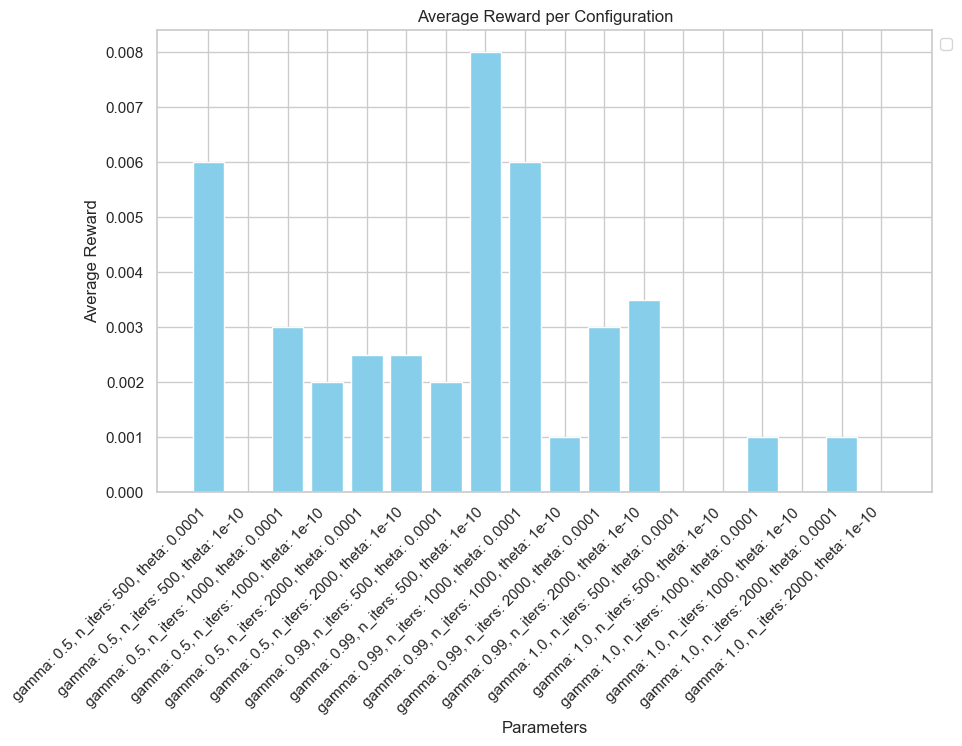

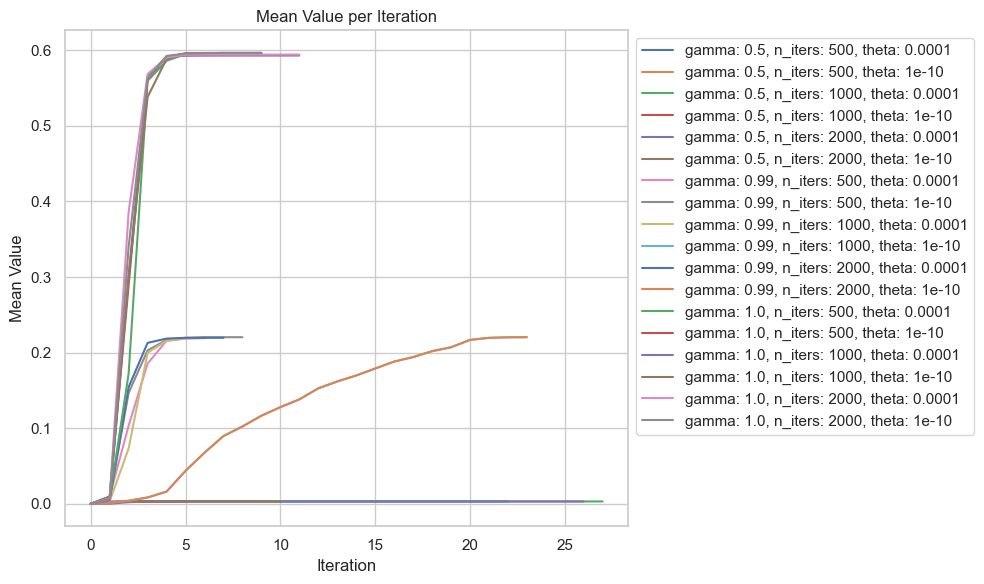

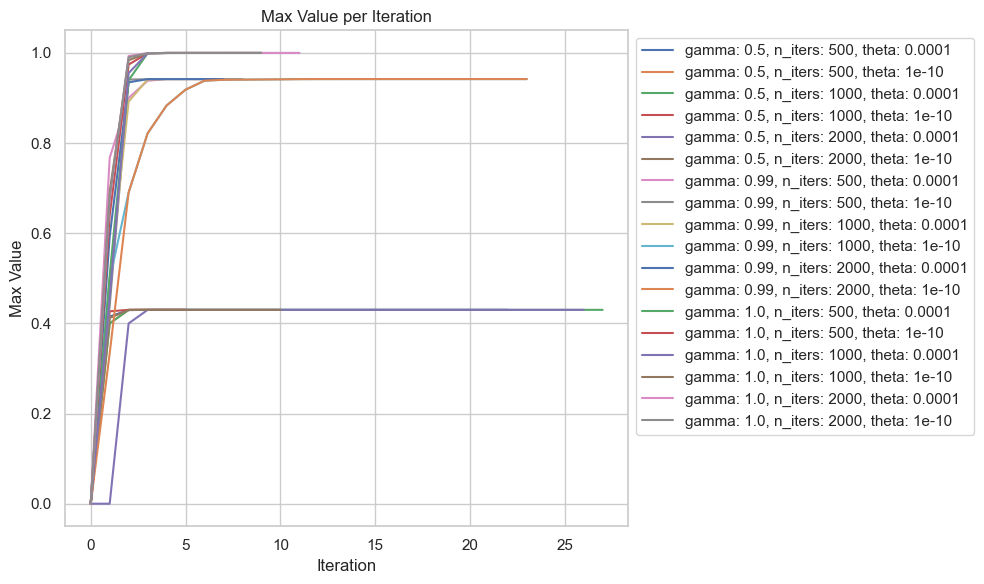

In [166]:
gamma=[.5, .99, 1.0]

iters = [500,1000 ,2000]
theta=[ .0001, .0000000001]
reward = {}
mean_pi = {}
max_pi = {}
for i in itertools.product(gamma, iters, theta):
    
    parameters = f"gamma: {i[0]}, n_iters: {i[1]}, theta: {i[2]}"
    V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=i[0], n_iters=i[1], theta=i[2])
    episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=i[1], pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward
    mean_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
    max_value_per_iter = np.trim_zeros(np.max(V_track, axis=1), 'b')
    mean_pi[parameters] = [np.arange(len(mean_value_per_iter)).tolist(), mean_value_per_iter.tolist()]
    max_pi[parameters] = [np.arange(len(max_value_per_iter)).tolist(), max_value_per_iter.tolist()]

# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in mean_pi.items():
    plt.plot(x, y, label=parameters)
plt.title("Mean Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plot for max_vi
plt.figure(figsize=(10, 6))
for parameters, (x, y) in max_pi.items():
    plt.plot(x, y, label=parameters)
plt.title("Max Value per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Max Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
    

/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.78 seconds


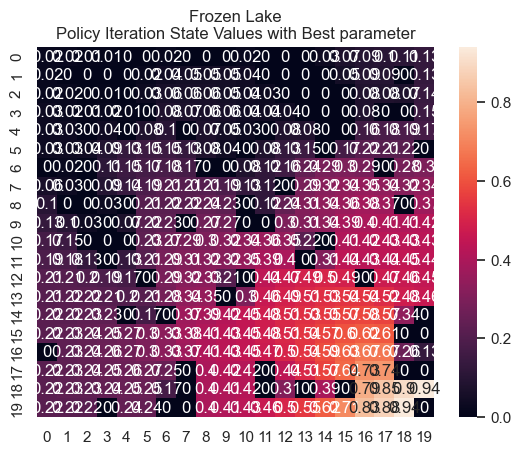

In [167]:
# 0.9, 1000, 0.00001

# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.99, n_iters=500, theta=0.0000000001)
size=(20,20)
Plots.values_heat_map(V, "Frozen Lake\nPolicy Iteration State Values with Best parameter", size)

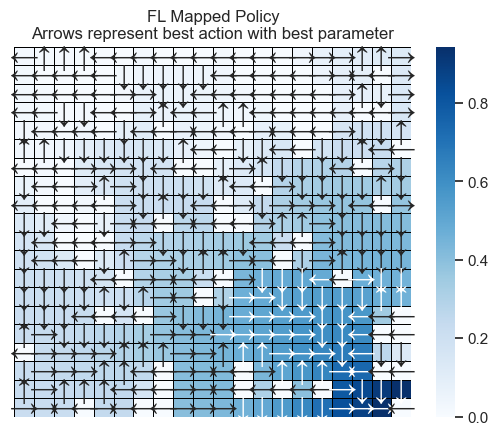

In [168]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(20,20)
title="FL Mapped Policy\nArrows represent best action with best parameter"
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

### Q-Learning

In [64]:
# frozen_lake = gym.make('FrozenLake8x8-v1', render_mode=None)
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(n_episodes=100000)
print(Q_track)

runtime = 27.95 seconds
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


  0%|          | 0/500 [00:00<?, ?it/s]/Users/davis901/anaconda3/envs/conda_env/lib/python3.11/site-packages/bettermdptools/algorithms/rl.py:179: UserWarning: Episode was truncated.  Bootstrapping 0 reward.
  warnings.warn("Episode was truncated.  Bootstrapping 0 reward.")


runtime = 0.12 seconds


runtime = 0.22 seconds


runtime = 0.43 seconds


runtime = 0.10 seconds


runtime = 0.20 seconds


runtime = 0.38 seconds


runtime = 0.09 seconds


runtime = 0.18 seconds


runtime = 0.37 seconds


runtime = 0.09 seconds


runtime = 0.17 seconds


runtime = 0.35 seconds


runtime = 0.11 seconds


runtime = 0.25 seconds


runtime = 0.42 seconds


runtime = 0.10 seconds


runtime = 0.20 seconds


runtime = 0.38 seconds


runtime = 0.09 seconds


runtime = 0.19 seconds


runtime = 0.36 seconds


runtime = 0.09 seconds


runtime = 0.17 seconds


runtime = 0.36 seconds


runtime = 0.11 seconds


runtime = 0.22 seconds


runtime = 0.45 seconds


runtime = 0.10 seconds


runtime = 0.21 seconds


runtime = 0.43 seconds


runtime = 0.10 seconds


runtime = 0.18 seconds


runtime = 0.35 seconds


runtime = 0.09 seconds


runtime = 0.18 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


runtime = 0.33 seconds


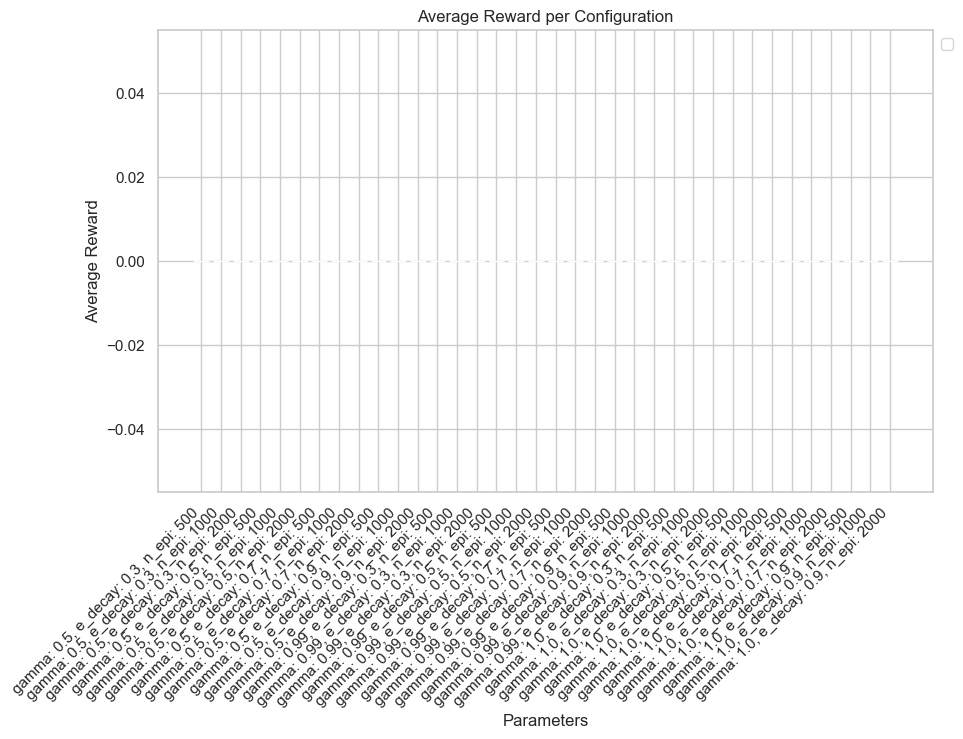

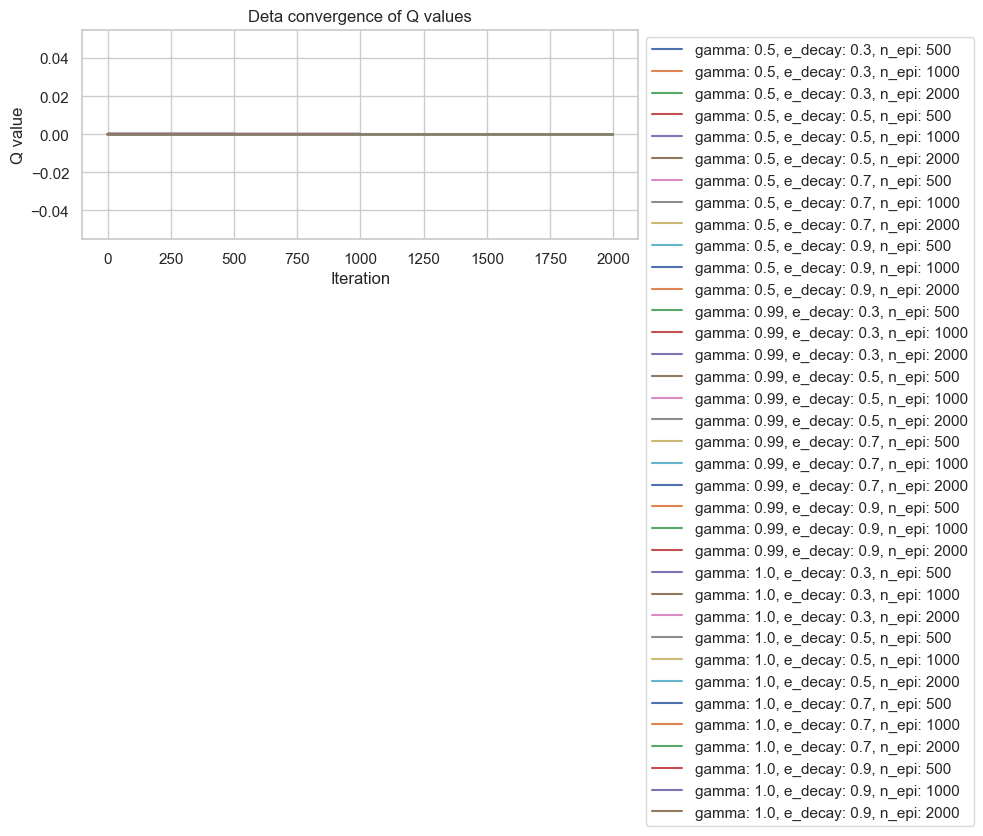

In [169]:

epsilons=[0.5, 0.7, 0.9, 0.99]
gamma=[.5, .99, 1.0]

iters = [500,1000 ,2000]
theta=[ .0001, .0000000001]
reward = {}
q_val = {}
for i in itertools.product(gamma, epsilons, iters):
    
    parameters = f"gamma: {i[0]}, e_decay: {i[1]}, n_epi: {i[2]}"
    Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=i[0], epsilon_decay_ratio=i[1], n_episodes=i[2])
    episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
    avg_reward =  np.mean(episode_rewards)
    reward[parameters] = avg_reward

    q_value_changes = np.zeros(Q_track.shape[0]-1)
    for i in range(1, Q_track.shape[0]):
        q_value_changes[i - 1] = np.mean((Q_track[i] - Q_track[i - 1]) ** 2)

        # Plot the MSE values
    # plt.plot(q_value_changes, label=cur_title)
    q_val[parameters] = q_value_changes
# Plot for reward
plt.figure(figsize=(10, 6))
plt.bar(reward.keys(), reward.values(), color='skyblue')
plt.title("Average Reward per Configuration")
plt.xlabel("Parameters")
plt.ylabel("Average Reward")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot for mean_vi
plt.figure(figsize=(10, 6))
for parameters, values in q_val.items():
    plt.plot(values, label=parameters)
plt.title("Deta convergence of Q values")
plt.xlabel("Iteration")
plt.ylabel("Q value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
